In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df=pd.read_csv('IPL_ball_by_ball_updated.csv')
#df.head()
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208036,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.4,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,VR Iyer,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.5,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.6,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,12.6,Chennai Super Kings,Kolkata Knight Riders,RV Uthappa,F du Plessis,CV Varun,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
req_df=df[(df.striker == 'MS Dhoni')]
req_df.head(7)
req_df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
207128,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,18.6,Chennai Super Kings,Delhi Capitals,MS Dhoni,MM Ali,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207130,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207131,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.3,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207132,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.4,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207133,1254114,2021,2021-10-10,Dubai International Cricket Stadium,2,19.5,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,TK Curran,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sum(req_df.runs_off_bat)

4746

In [5]:
len(req_df)

3604

In [6]:
len(req_df[req_df.player_dismissed == 'MS Dhoni'])

117

In [7]:
100*sum(req_df.runs_off_bat)/len(req_df)

131.68701442841288

In [8]:
%load_ext google.colab.data_table

final_df=pd.DataFrame()
for i in range(14):
  MS_seasonwise=req_df[(df.season==(i+2008))]
  bdf1 = pd.DataFrame(MS_seasonwise.groupby('striker')['runs_off_bat'].sum()).reset_index()
  bdf2 = pd.DataFrame(MS_seasonwise.groupby('striker')['ball'].count()).reset_index()
  bdf3 = bdf1.merge(bdf2, on = 'striker', how = 'left')
  bdf3['strike_rate'] = 100*bdf3['runs_off_bat']/bdf3['ball']
  bdf3['season']=i+2008
  final_df=final_df.append(bdf3,ignore_index=True)
print(final_df)

     striker  runs_off_bat  ball  strike_rate  season
0   MS Dhoni  414           319   129.780564   2008  
1   MS Dhoni  332           270   122.962963   2009  
2   MS Dhoni  287           215   133.488372   2010  
3   MS Dhoni  392           247   158.704453   2011  
4   MS Dhoni  358           283   126.501767   2012  
5   MS Dhoni  461           298   154.697987   2013  
6   MS Dhoni  371           258   143.798450   2014  
7   MS Dhoni  372           309   120.388350   2015  
8   MS Dhoni  284           220   129.090909   2016  
9   MS Dhoni  290           261   111.111111   2017  
10  MS Dhoni  455           321   141.744548   2018  
11  MS Dhoni  416           317   131.230284   2019  
12  MS Dhoni  200           175   114.285714   2020  
13  MS Dhoni  114           111   102.702703   2021  


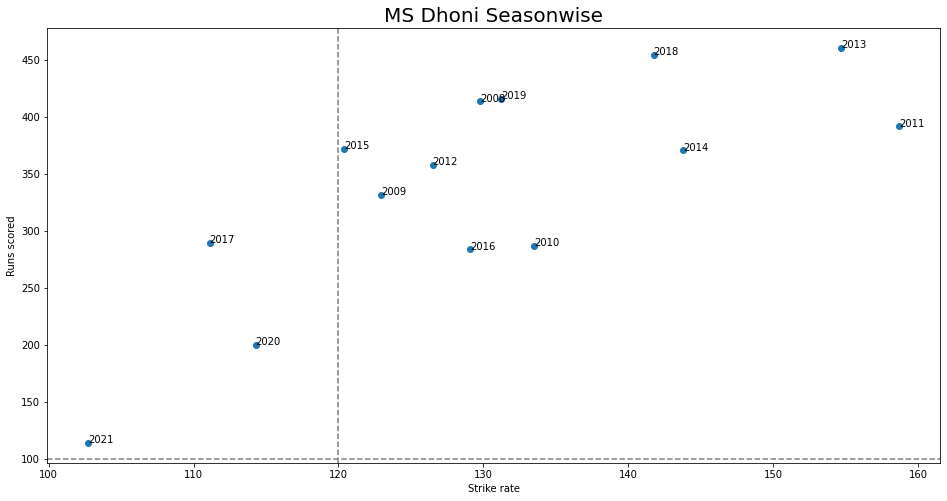

In [9]:
plt.figure(figsize = (16, 8))
plt.scatter(final_df.strike_rate, final_df.runs_off_bat)

for i in range(len(final_df)):
  plt.text(final_df['strike_rate'][i] , final_df['runs_off_bat'][i], final_df['season'][i] )
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(100, ls = '--', color = 'grey')
plt.title('MS Dhoni Seasonwise', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



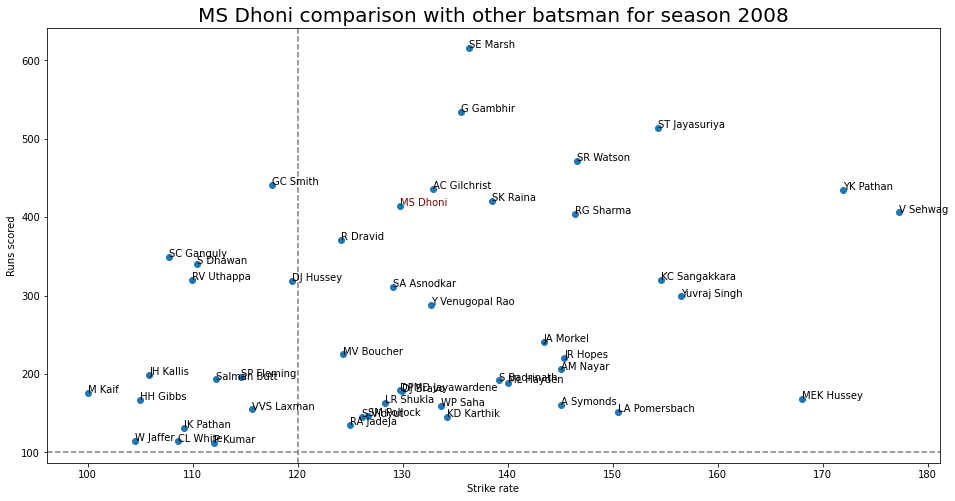

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



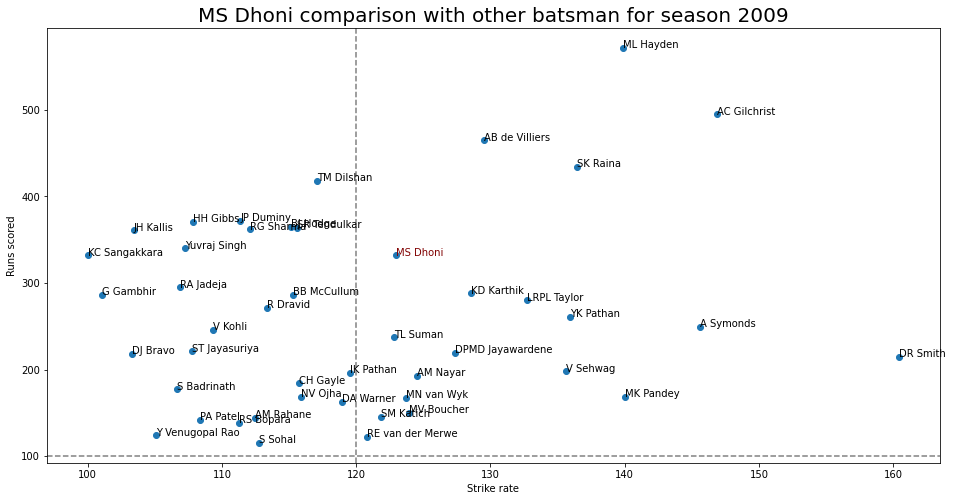

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



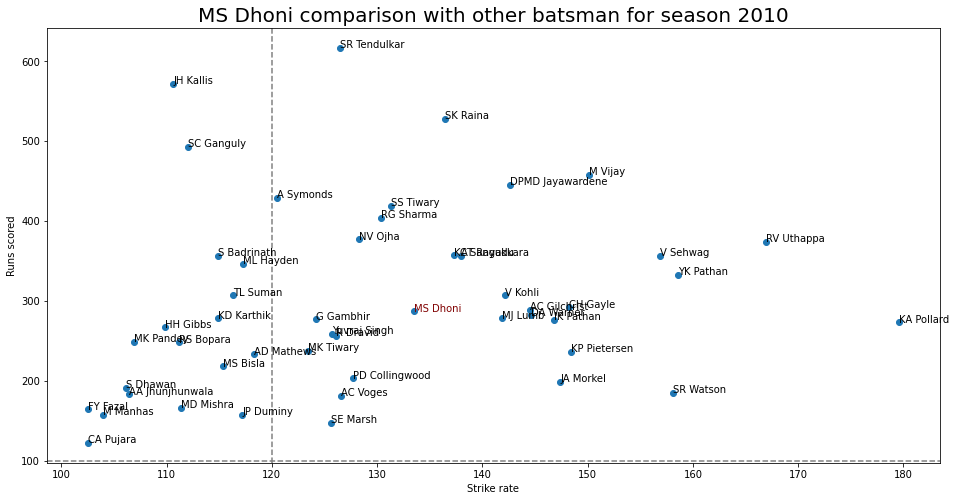

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



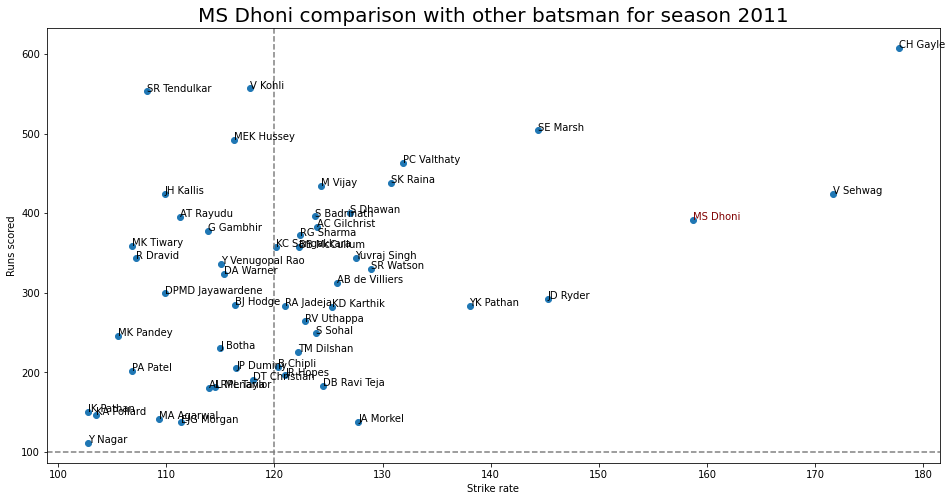

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



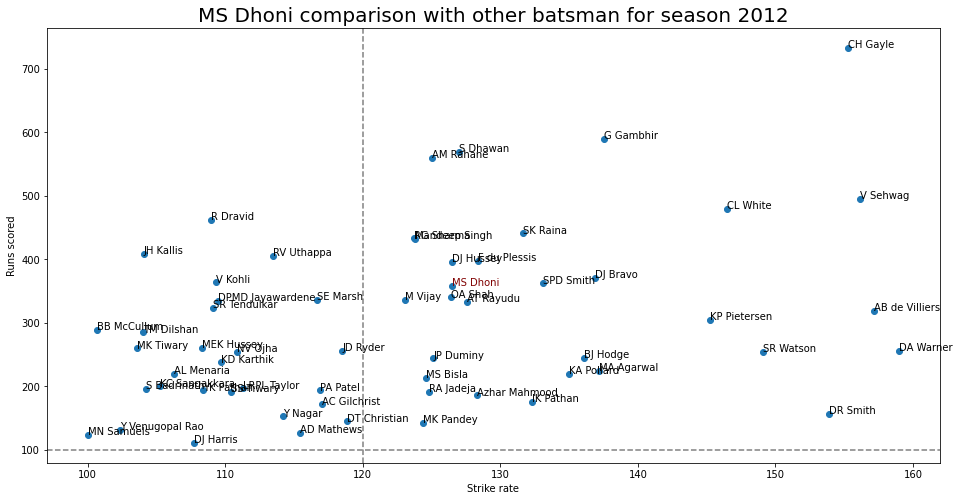

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



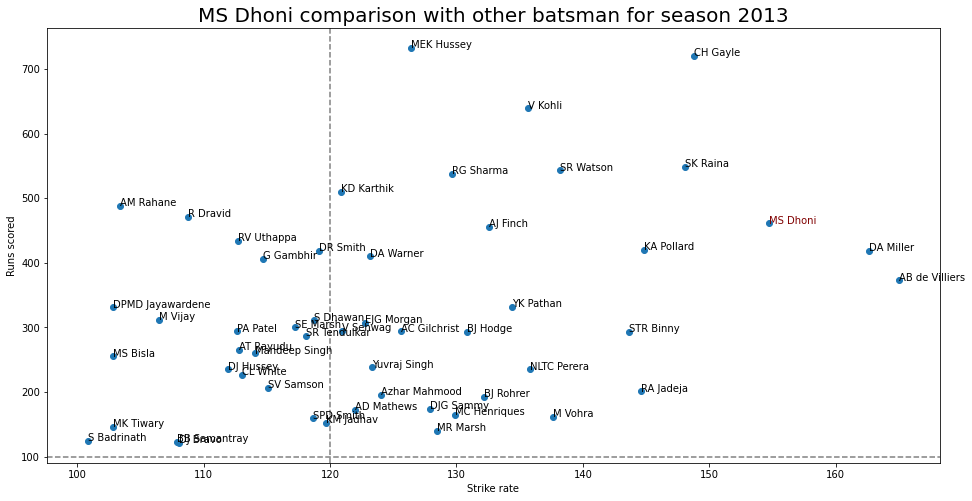

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



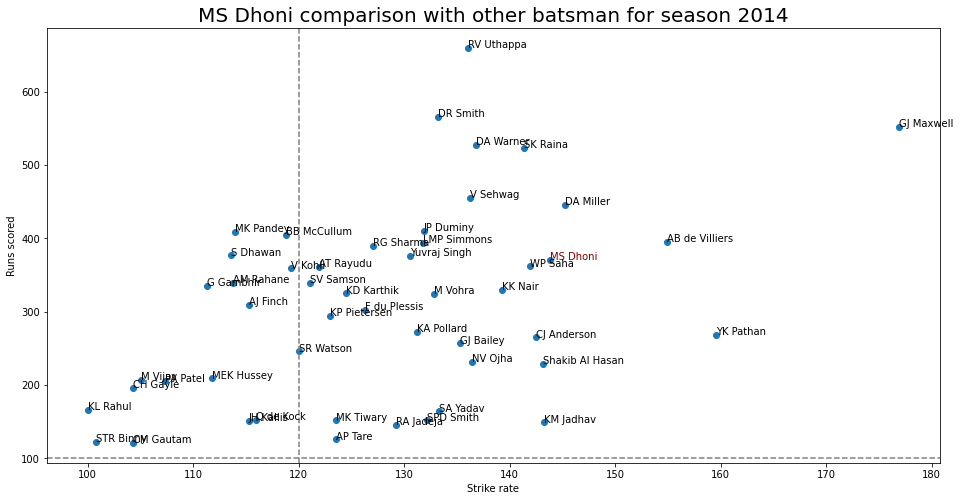

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



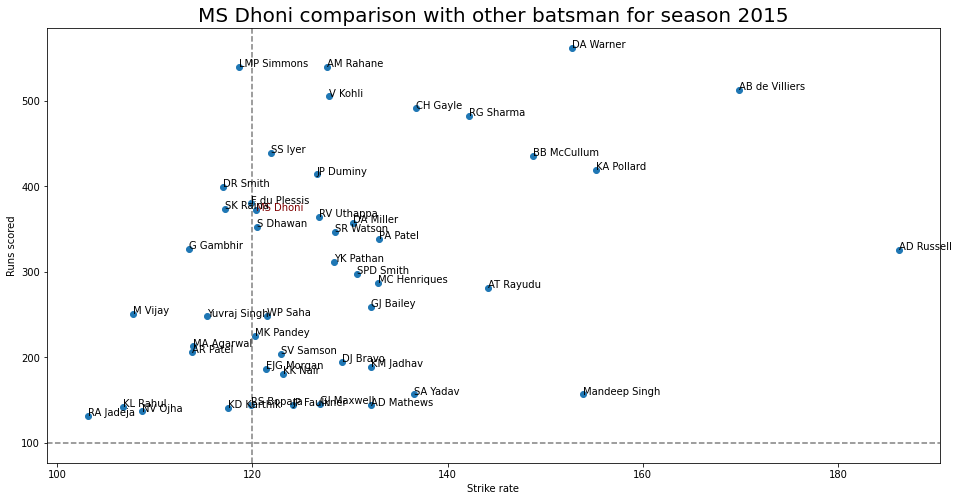

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



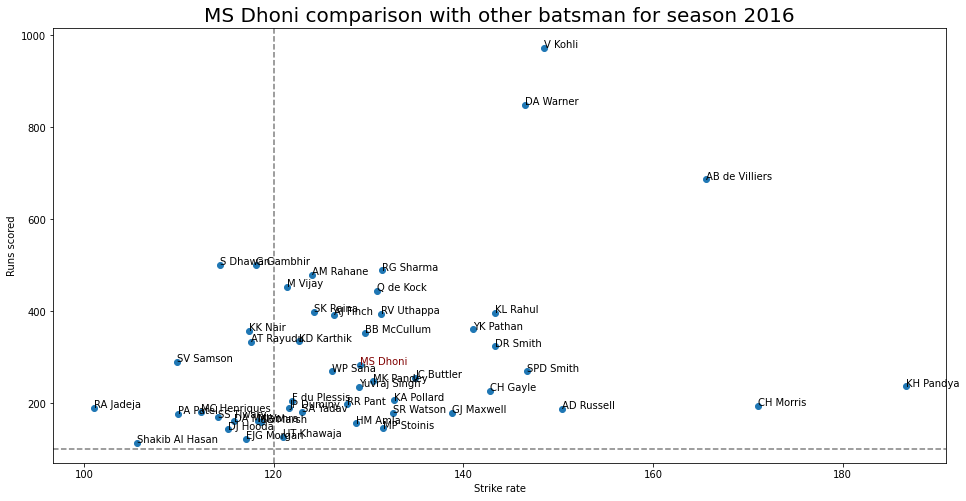

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



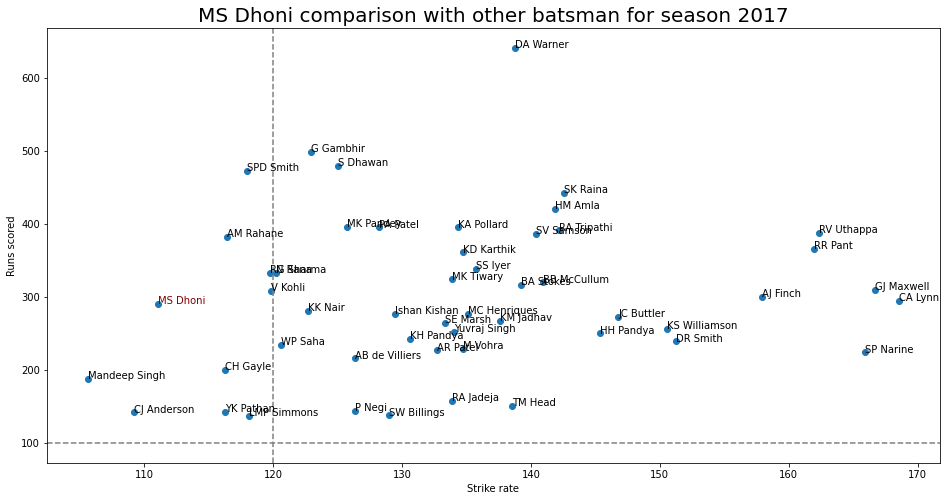

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



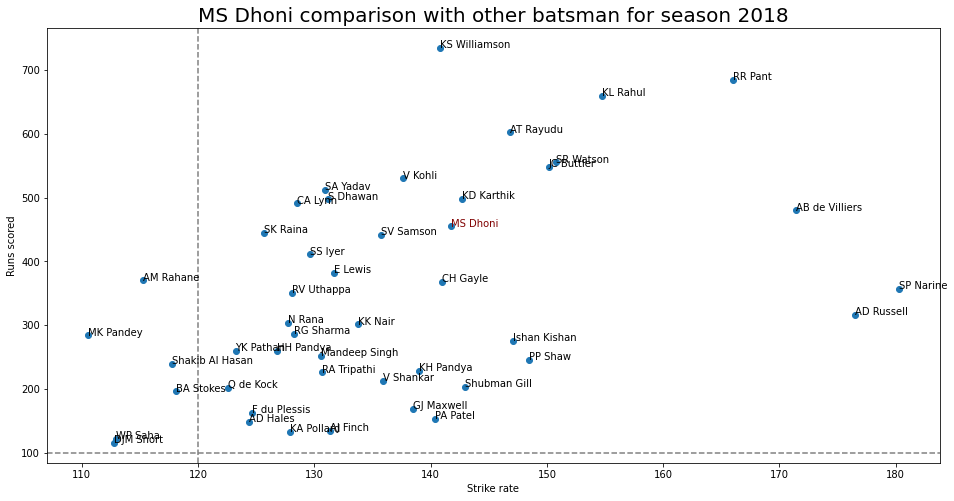

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



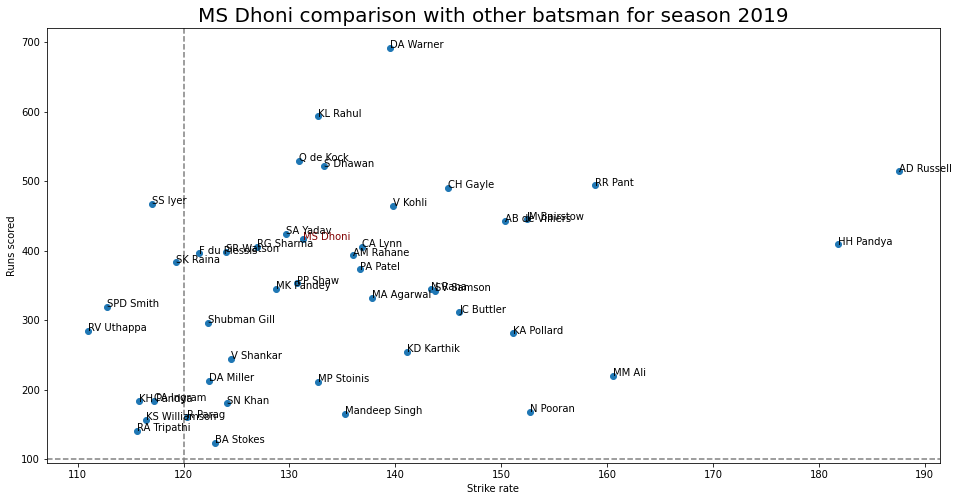

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



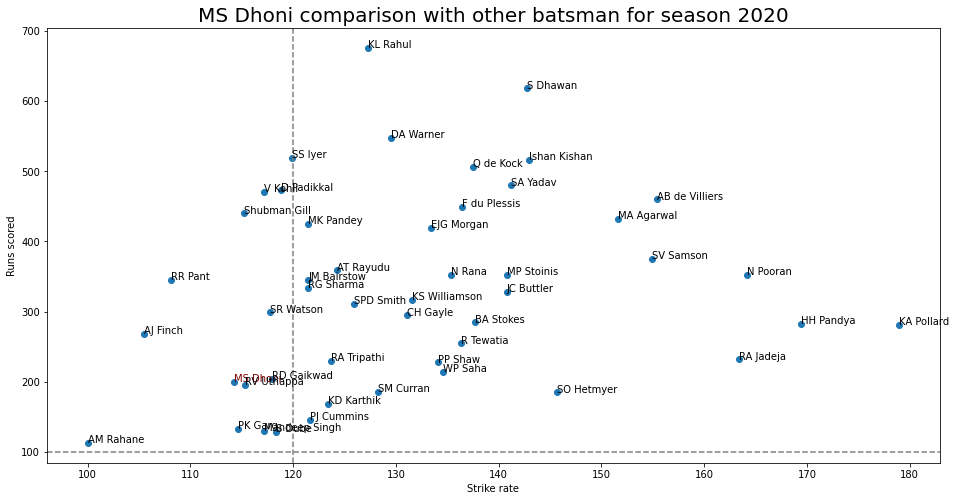

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



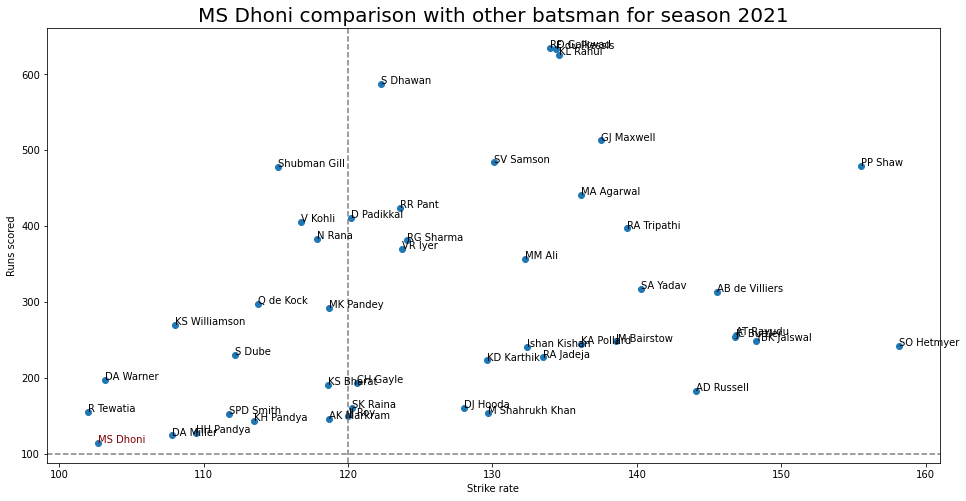

In [10]:
for a in range(14):
  other_final=pd.DataFrame()
  unique_batsman=df[(df.season==(a+2008))]
  print(unique_batsman)
  adf1 = pd.DataFrame(unique_batsman.groupby('striker')['runs_off_bat'].sum()).reset_index()
  adf2 = pd.DataFrame(unique_batsman.groupby('striker')['ball'].count()).reset_index()
  adf3 = adf1.merge(adf2, on = 'striker', how = 'left')
  adf3['strike_rate'] = 100*adf3['runs_off_bat']/adf3['ball']
  adf3 = adf3[adf3.ball >= 100]
  adf3=adf3[adf3.runs_off_bat>=100]
  adf3=adf3[adf3.strike_rate>=100]
  other_final=other_final.append(adf3,ignore_index=True)
  plt.figure(figsize = (16, 8))
  plt.scatter(other_final.strike_rate, other_final.runs_off_bat)
  for i in range(len(other_final)):
    if other_final.striker[i] == 'MS Dhoni':
      plt.text(other_final['strike_rate'][i] , other_final['runs_off_bat'][i], other_final['striker'][i],color='maroon' )
    else:
      plt.text(other_final['strike_rate'][i] , other_final['runs_off_bat'][i], other_final['striker'][i])
  plt.axvline(120, ls = '--', color = 'grey')
  plt.axhline(100, ls = '--', color = 'grey')
  plt.title('MS Dhoni comparison with other batsman for season '+str(a+2008), fontsize = 20)
  plt.xlabel('Strike rate')
  plt.ylabel('Runs scored')
  plt.show()